# Informatietheorie

📚 [^goodfellow]
[^goodfellow]: Deze sectie is gebaseerd op sectie 3.13 uit [Goodfellow et al. (2016)](https://www.deeplearningbook.org/)

(target-information-theory)=
**Informatietheorie** is een tak van de toegepaste wiskunde die draait om het kwantificeren van informatie in signalen. Dit domein werd oorspronkelijk ontwikkeld voor communicatie over ruis-gevoelige kanalen (zoals radiotransmissie), maar het is zeer aanwezig in machine learning om de mate van onzekerheid in probabiliteitsdistributies uit te drukken.

:::{note} 🌍
:icon: false
:class: simple

De basis-intuïtie van informatietheorie is simpel. Stel dat we met de volgende berichten geconfronteerd worden:
1. De zon is vanochtend opgekomen
2. Er was vanochtend een zonsverduistering  
  
We zien onmiddellijk dat het tweede bericht informatiever is dan het eerste. Dat kunnen wiskundig uitdrukken aan de hand van probabiliteit:
{u}`Zeldzame gebeurtenissen bevatten meer informatie dan waarschijnlijke gebeurtenissen`.
:::

## _Self-Information_
(target-self-information)=
De _self-information_ van een gebeurtenis $\text{x} = x$ kwantificeert hoeveel informatie die gebeurtenis bevat:

$$
I(x) = -log P(x)
$$

Deze formule voldoet aan drie intuïties waaraan een wiskundige uitdrukking van informatie moet voldoen:

1. Waarschijnlijke gebeurtenissen moeten een lagere informatiewaarde krijgen:
   - Bij $P(x) = 1$ is er maximale zekerheid over de uitkomst; de _self-information_ wordt $I(x) = -log(1) = 0$
   - Bij $P(x) < 1$ stijgt de informatiewaarde: bv. $P(x) = 0.9 \Rightarrow I(x) = -log(0.9) \approx 0.11$

2. Onwaarschijnlijke gebeurtenissen moeten een hogere informatiewaarde krijgen:
   - $P(x) = 0.1 \Rightarrow I(x) = -log(0.1) \approx 2.3$
   - $P(x) = 0.01 \Rightarrow I(x) = -log(0.01) \approx 4.61$ 

3. Onafhankelijke gebeurtenissen moeten een additieve informatiewaarde hebben:  
$$
x \perp y
$$

$$
\begin{align}
I(x, y) &= -log P(x, y) \cr
&= -log P(x)P(y) \cr
&= -log P(x) - log P(y) \cr
&= I(x) + I(y)
\end{align}
$$

De eenheid van _self-information_ wordt bepaald door de (arbitraire) basis van het logaritme:
- $e$ bij het natuurlijke logaritme $-\text{ln} P(x)$: de informatiewaarde wordt in _nats_ uitgedrukt
- $- \text{log}_2 P(x)$: _bits_ of _shannons_[^shannon]
[^shannon]: Vernoemd naar [Claude E. Shannon](https://en.wikipedia.org/wiki/Claude_Shannon), de grondlegger van de informatietheorie.

:::{note} 🌍
:icon: false
:class: simple
Bij een eerlijke dobbelsteen krijgen we:

$$
\begin{align}
-\text{ln}(\frac{1}{6}) &\approx 1.79 \text{ nats} \cr
-\text{log}_2(\frac{1}{6}) &\approx 2.58 \text{ bits} 
\end{align}
$$
:::

## _Shannon_ entropie

(target-shannon-entropy)=
De **_Shannon_[^shannon] entropie** meet de gemiddelde hoeveelheid informatie (of onzekerheid) op het niveau van de gehele kansverdeling:

$$
H(\text{x}) = \mathbb{E}[I(\text{x})] = -\mathbb{E}[\log P(\text{x})] = -\sum_x P(x) \log P(x)
$$

Voor continue variabelen wordt dit:
$$
H(\text{x}) = -\int p(x) \log p(x) dx
$$

Eigenschappen:  
- $H(\text{x}) \leq 0$
- $H(\text{x}) = 0$ wanneer de verdeling deterministisch is (één uitkomst heeft $P(x)=1$)
- $H(\text{x})$ is maximaal voor een uniforme verdeling ($P(x)=\frac{1}{k}$ in het discrete geval)

:::{note} 🌍
:icon: false
:class: simple
Stel dat we een munt opwerpen en kijken naar de binaire uitkomst $\text{kop}$: $x \isin {0, 1}$. In dit geval neemt de entropie-formule (gezien de {ref}`complementregel <target-prob-complement-rule>`) volgende vorm aan:

$$
H(\text{x}) = -P(x) \log P(x) - (1-P(x)) \log(1-P(x))
$$

Bij een eerlijke munt krijgen we de maximale waarde en zijn we het meest onzeker over de uitkomst.

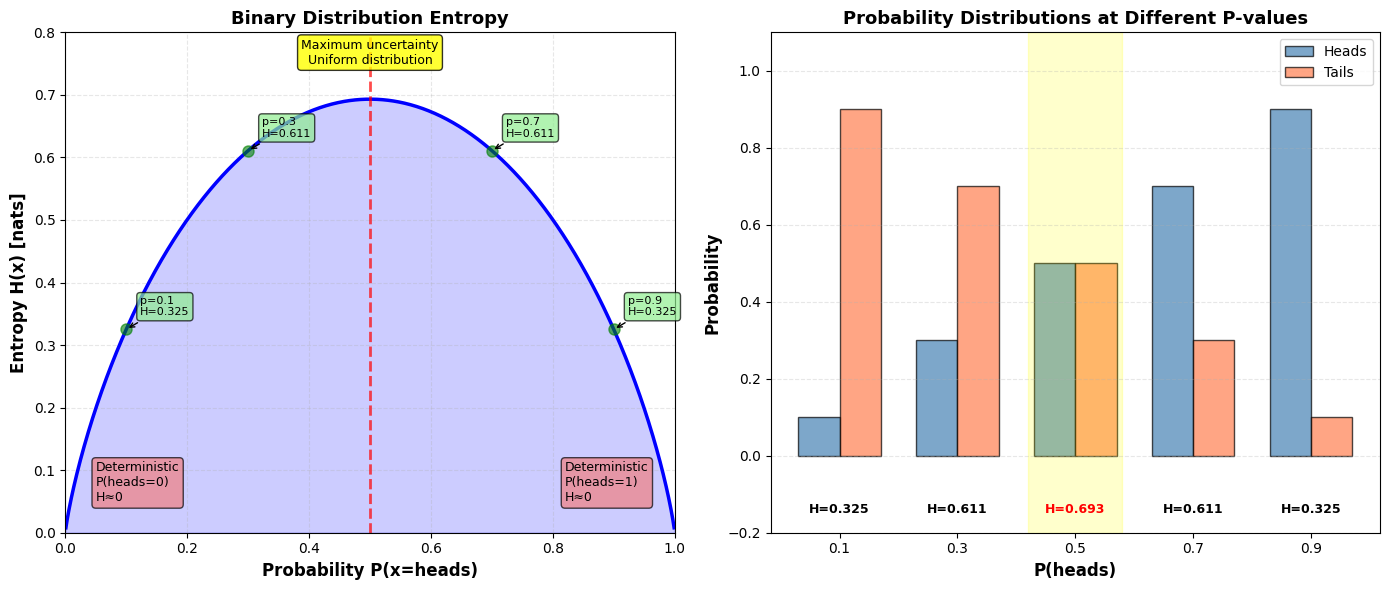

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize entropy for binary distribution (coin flip)
# Create probability values from 0 to 1
p_values = np.linspace(0.001, 0.999, 1000)


# Calculate entropy for each probability value
# H(x) = -p*log(p) - (1-p)*log(1-p)
def binary_entropy(p):
    """Calculate entropy for binary distribution."""
    return -(p * np.log(p) + (1 - p) * np.log(1 - p))


H_values = binary_entropy(p_values)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Entropy curve
ax = axes[0]
ax.plot(p_values, H_values, "b-", linewidth=2.5)
ax.fill_between(p_values, H_values, alpha=0.2, color="blue")

# Mark maximum at p=0.5
max_entropy = binary_entropy(0.5)
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2, alpha=0.7)

# Mark some specific points
specific_points = [0.1, 0.3, 0.7, 0.9]
for p in specific_points:
    h = binary_entropy(p)
    ax.plot(p, h, "go", markersize=8, alpha=0.6)
    ax.annotate(
        f"p={p}\nH={h:.3f}",
        xy=(p, h),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=8,
        bbox={"boxstyle": "round,pad=0.3", "facecolor": "lightgreen", "alpha": 0.7},
        arrowprops={"arrowstyle": "->", "connectionstyle": "arc3,rad=0", "lw": 1},
    )

ax.set_xlabel("Probability P(x=heads)", fontsize=12, fontweight="bold")
ax.set_ylabel("Entropy H(x) [nats]", fontsize=12, fontweight="bold")
ax.set_title("Binary Distribution Entropy", fontsize=13, fontweight="bold")
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.8)
ax.grid(alpha=0.3, linestyle="--")

# Add annotations for extreme cases
ax.text(
    0.05,
    0.05,
    "Deterministic\nP(heads=0)\nH≈0",
    fontsize=9,
    bbox={"boxstyle": "round", "facecolor": "lightcoral", "alpha": 0.7},
)
ax.text(
    0.82,
    0.05,
    "Deterministic\nP(heads=1)\nH≈0",
    fontsize=9,
    bbox={"boxstyle": "round", "facecolor": "lightcoral", "alpha": 0.7},
)
ax.text(
    0.5,
    0.75,
    "Maximum uncertainty\nUniform distribution",
    fontsize=9,
    ha="center",
    bbox={"boxstyle": "round", "facecolor": "yellow", "alpha": 0.8},
)

# Right plot: Bar chart showing distributions at specific points
ax = axes[1]
demo_probs = [0.1, 0.3, 0.5, 0.7, 0.9]
x_pos = np.arange(len(demo_probs))
width = 0.35

for i, p in enumerate(demo_probs):
    # Probability of heads and tails
    prob_heads = p
    prob_tails = 1 - p
    h = binary_entropy(p)

    # Create bars for this distribution
    ax.bar(
        i - width / 2,
        prob_heads,
        width,
        label="Heads" if i == 0 else "",
        color="steelblue",
        alpha=0.7,
        edgecolor="black",
    )
    ax.bar(
        i + width / 2,
        prob_tails,
        width,
        label="Tails" if i == 0 else "",
        color="coral",
        alpha=0.7,
        edgecolor="black",
    )

    # Add entropy value below
    ax.text(
        i,
        -0.15,
        f"H={h:.3f}",
        ha="center",
        fontsize=9,
        fontweight="bold",
        color="red" if p == 0.5 else "black",
    )

ax.set_ylabel("Probability", fontsize=12, fontweight="bold")
ax.set_xlabel("P(heads)", fontsize=12, fontweight="bold")
ax.set_title("Probability Distributions at Different P-values", fontsize=13, fontweight="bold")
ax.set_xticks(x_pos)
ax.set_xticklabels([f"{p:.1f}" for p in demo_probs])
ax.set_ylim(-0.2, 1.1)
ax.legend(fontsize=10, loc="upper right")
ax.grid(axis="y", alpha=0.3, linestyle="--")

# Highlight maximum entropy case
ax.axvspan(x_pos[2] - 0.4, x_pos[2] + 0.4, alpha=0.2, color="yellow")

plt.tight_layout()
plt.show()

## Kullback-Leibler (KL) divergentie

(target-kl-divergence)=
Als we twee aparte kansdistributies $P(x)$ en $Q(x)$ over dezelfde random variabele $\text{x}$ hebben, kunnen we meten hoe verschillend deze twee distributies zijn met de **Kullback-Leibler divergentie**:

$$
D_{KL}(P \parallel Q) = \mathbb{E}_{x \sim P}\left[\log \frac{P(x)}{Q(x)}\right] = \mathbb{E}_{x \sim P}[\log P(x) - \log Q(x)]
$$

Voor discrete variabelen:

$$
D_{KL}(P \parallel Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}
$$

Voor continue variabelen:

$$
D_{KL}(P \parallel Q) = \int p(x) \log \frac{p(x)}{q(x)} dx
$$

Eigenschappen:

1. $D_{KL}(P \parallel Q) \geq 0$: Altijd positief
2. $D_{KL}(P \parallel Q) = 0 \Leftrightarrow P = Q$: Nul bij identieke verdelingen
3. $D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P)$: ⚠️ _Niet_ symmetrisch

:::{warning}
Uit (3) volgt dat de KL-divergentie {u}`niet als een echte afstandsmaat` mag worden beschouwd. Ze voldoet immers niet aan de driehoeksongelijkheid. De keuze tussen $D_{KL}(P \parallel Q)$ en $D_{KL}(Q \parallel P)$ heeft belangrijke consequenties:

- **$D_{KL}(P \parallel Q)$** (_forward KL_): Straft waar $Q$ een lage kans heeft en $P$ een hoge.
  
- **$D_{KL}(Q \parallel P)$** (_reverse KL_): Straft waar $Q$ een hoge kans heeft en $P$ een lage.
:::

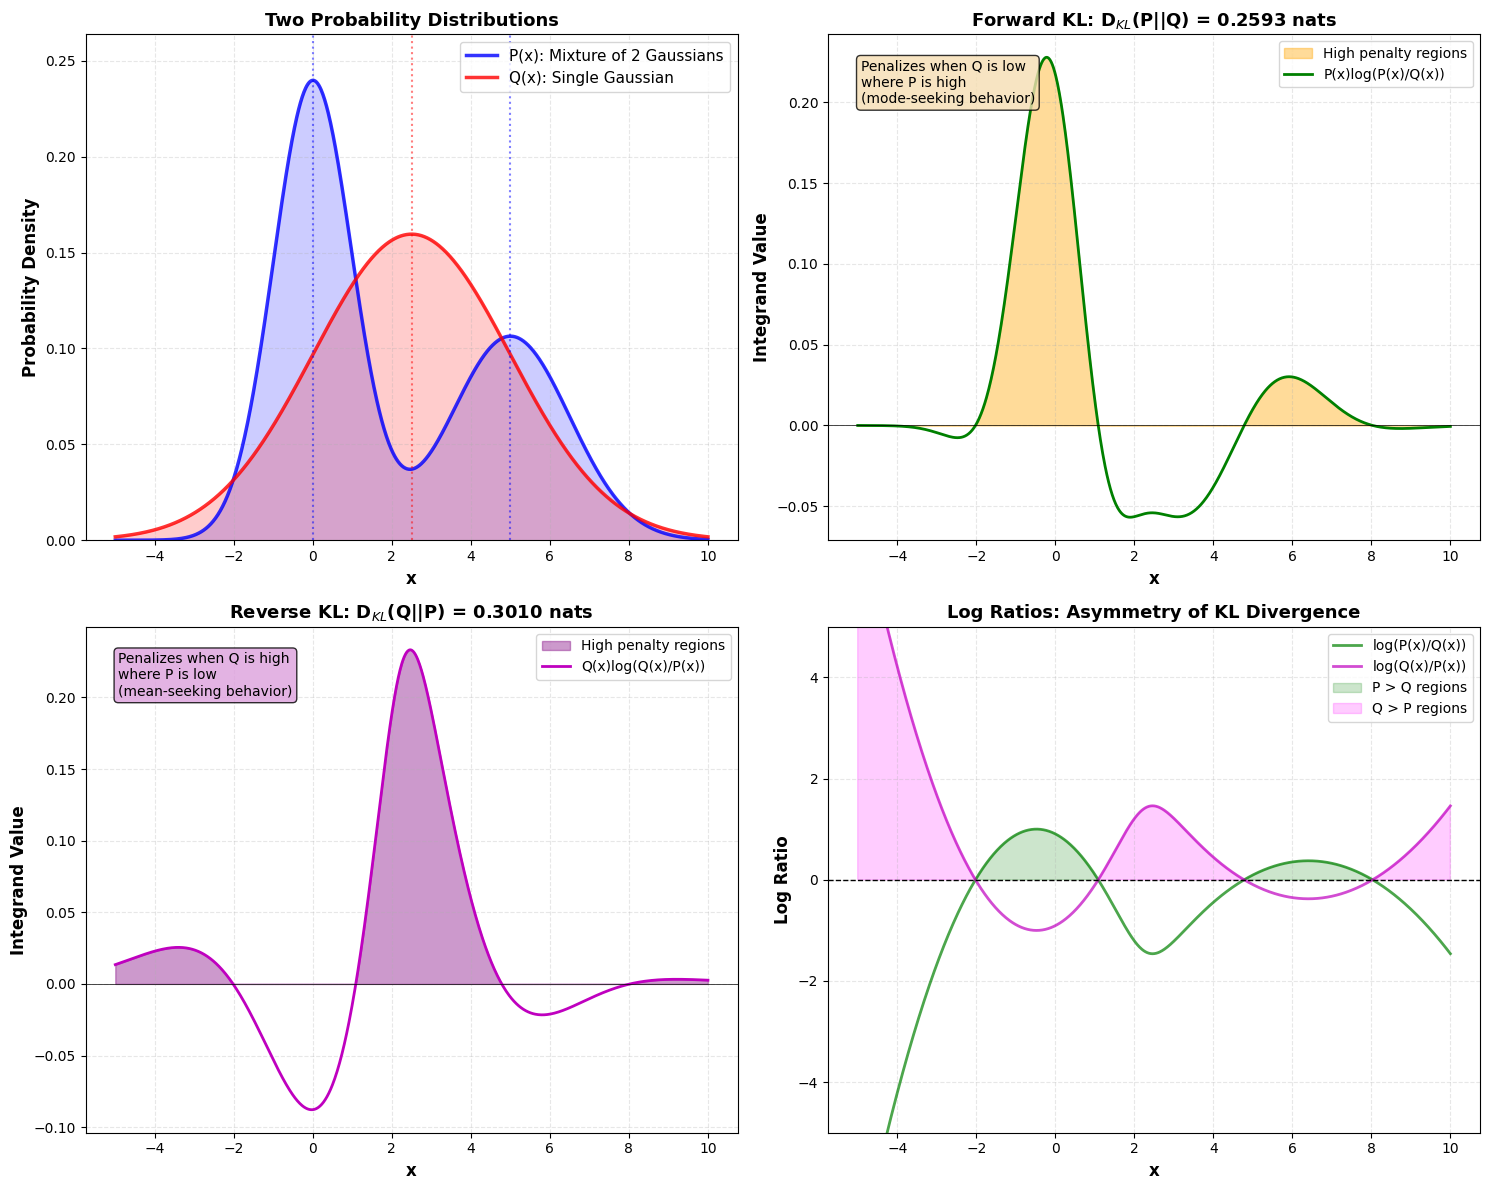

In [16]:
from scipy import stats

# Define the distributions
x = np.linspace(-5, 10, 1000)

# P(x): Mixture of 2 Gaussians (true distribution)
# 60% from N(0, 1) and 40% from N(5, 1.5)
mu1, sigma1, weight1 = 0, 1, 0.6
mu2, sigma2, weight2 = 5, 1.5, 0.4

p_x = weight1 * stats.norm.pdf(x, mu1, sigma1) + weight2 * stats.norm.pdf(x, mu2, sigma2)

# Q(x): Single Gaussian (approximating distribution)
mu_q, sigma_q = 2.5, 2.5
q_x = stats.norm.pdf(x, mu_q, sigma_q)

# Calculate KL divergences
# D_KL(P||Q) - forward KL
# We need to be careful with numerical stability
epsilon = 1e-10
p_safe = np.where(p_x > epsilon, p_x, epsilon)
q_safe = np.where(q_x > epsilon, q_x, epsilon)

# Forward KL: D_KL(P||Q) = ∫ P(x) log(P(x)/Q(x)) dx
integrand_forward = p_safe * np.log(p_safe / q_safe)
kl_forward = np.trapezoid(integrand_forward, x)

# Reverse KL: D_KL(Q||P) = ∫ Q(x) log(Q(x)/P(x)) dx
integrand_reverse = q_safe * np.log(q_safe / p_safe)
kl_reverse = np.trapezoid(integrand_reverse, x)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top left: Show both distributions
ax = axes[0, 0]
ax.plot(x, p_x, "b-", linewidth=2.5, label="P(x): Mixture of 2 Gaussians", alpha=0.8)
ax.fill_between(x, p_x, alpha=0.2, color="blue")
ax.plot(x, q_x, "r-", linewidth=2.5, label="Q(x): Single Gaussian", alpha=0.8)
ax.fill_between(x, q_x, alpha=0.2, color="red")

# Mark the means
ax.axvline(mu1, color="blue", linestyle=":", alpha=0.5, linewidth=1.5)
ax.axvline(mu2, color="blue", linestyle=":", alpha=0.5, linewidth=1.5)
ax.axvline(mu_q, color="red", linestyle=":", alpha=0.5, linewidth=1.5)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Probability Density", fontsize=12, fontweight="bold")
ax.set_title("Two Probability Distributions", fontsize=13, fontweight="bold")
ax.legend(fontsize=11, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_ylim(0, max(p_x.max(), q_x.max()) * 1.1)

# Top right: Forward KL - D_KL(P||Q)
ax = axes[0, 1]
# Highlight regions where P is high but Q is low
highlight_forward = np.where(p_x > q_x, integrand_forward, 0)
ax.fill_between(x, highlight_forward, alpha=0.4, color="orange", label="High penalty regions")
ax.plot(x, integrand_forward, "g-", linewidth=2, label="P(x)log(P(x)/Q(x))")
ax.axhline(0, color="black", linestyle="-", linewidth=0.5)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Integrand Value", fontsize=12, fontweight="bold")
ax.set_title(
    f"Forward KL: D$_{{KL}}$(P||Q) = {kl_forward:.4f} nats", fontsize=13, fontweight="bold"
)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, linestyle="--")

# Add annotation
ax.text(
    0.05,
    0.95,
    "Penalizes when Q is low\nwhere P is high",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox={"boxstyle": "round", "facecolor": "wheat", "alpha": 0.8},
)

# Bottom left: Reverse KL - D_KL(Q||P)
ax = axes[1, 0]
# Highlight regions where Q is high but P is low
highlight_reverse = np.where(q_x > p_x, integrand_reverse, 0)
ax.fill_between(x, highlight_reverse, alpha=0.4, color="purple", label="High penalty regions")
ax.plot(x, integrand_reverse, "m-", linewidth=2, label="Q(x)log(Q(x)/P(x))")
ax.axhline(0, color="black", linestyle="-", linewidth=0.5)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Integrand Value", fontsize=12, fontweight="bold")
ax.set_title(
    f"Reverse KL: D$_{{KL}}$(Q||P) = {kl_reverse:.4f} nats", fontsize=13, fontweight="bold"
)
ax.legend(fontsize=10)
ax.grid(alpha=0.3, linestyle="--")

# Add annotation
ax.text(
    0.05,
    0.95,
    "Penalizes when Q is high\nwhere P is low",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox={"boxstyle": "round", "facecolor": "plum", "alpha": 0.8},
)

# Bottom right: Comparison of log ratios
ax = axes[1, 1]
log_ratio_forward = np.log(p_safe / q_safe)
log_ratio_reverse = np.log(q_safe / p_safe)

ax.plot(x, log_ratio_forward, "g-", linewidth=2, label="log(P(x)/Q(x))", alpha=0.7)
ax.plot(x, log_ratio_reverse, "m-", linewidth=2, label="log(Q(x)/P(x))", alpha=0.7)
ax.axhline(0, color="black", linestyle="--", linewidth=1)
ax.fill_between(
    x,
    0,
    log_ratio_forward,
    where=(log_ratio_forward > 0),
    alpha=0.2,
    color="green",
    label="P > Q regions",
)
ax.fill_between(
    x,
    0,
    log_ratio_reverse,
    where=(log_ratio_reverse > 0),
    alpha=0.2,
    color="magenta",
    label="Q > P regions",
)

ax.set_xlabel("x", fontsize=12, fontweight="bold")
ax.set_ylabel("Log Ratio", fontsize=12, fontweight="bold")
ax.set_title("Log Ratios: Asymmetry of KL Divergence", fontsize=13, fontweight="bold")
ax.legend(fontsize=10, loc="upper right")
ax.grid(alpha=0.3, linestyle="--")
ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()

## Cross-entropie

(target-cross-entropy)=
Een grootheid die nauw verwant is aan de KL divergentie is de **cross-entropie**:

(H_P_Q)=
$$
H(P, Q) = H(P) + D_{KL}(P \parallel Q)
$$

wat equivalent is aan:

$$
H(P, Q) = -\mathbb{E}_{x \sim P}[\log Q(x)]
$$

Voor discrete variabelen:
$$
H(P, Q) = -\sum_x P(x) \log Q(x)
$$

Voor continue variabelen:
$$
H(P, Q) = -\int p(x) \log q(x) dx
$$

{u}`Waarom cross-entropie in plaats van KL divergentie?`

In machine learning wordt cross-entropie als _loss_ functie gebruikt waarbij:
- $P$: de ware distributie van de trainingsdata voorstelt
- $Q$: de distributie van de modelvoorspellingen voorstelt
  
We willen de modelparameters en dus $Q$ zo kiezen, dat de cross-entropie minimaal wordt. Het minimaliseren van cross-entropie met betrekking tot $Q$ is _equivalent_ aan het minimaliseren van de KL divergentie, omdat $Q$ niet deelneemt aan de $H(P)$ term in {eq}`H_P_Q`:

$$
\arg\min_Q H(P, Q) = \arg\min_Q [H(P) + D_{KL}(P \parallel Q)] = \arg\min_Q D_{KL}(P \parallel Q)
$$

De term $H(P)$ is een **constante** tijdens optimalisatie (hangt niet af van de modelparameters in $Q$), en valt dus weg bij het nemen van de afgeleide. We prefereren cross-entropie als loss functie omdat:

1. **Berekenbaarheid**: We kunnen $H(P, Q) = -\mathbb{E}_{x \sim P}[\log Q(x)]$ direct berekenen uit de trainingsdata, terwijl we voor KL divergentie ook $H(P) = -\mathbb{E}_{x \sim P}[\log P(x)]$ zouden moeten kennen, maar we kennen de ware distributie $P$ niet exact (we hebben alleen samples)

2. **Eenvoud**: Cross-entropie heeft een eenvoudigere implementatie - we hebben alleen de modelvoorspellingen $Q(x)$ en de labels nodig

3. **Numerieke stabiliteit**: De formule is rechtstreekser en minder gevoelig voor numerieke fouten

De volgende code demonstreert waarom beide loss functies tot dezelfde modelparameters leiden.
  
{u}`Voorbeelden in klassificatie`

We zagen reeds het voorbeeld van cross-entropie _loss_ functies in de context van
1. Binaire klassificatie (_binary cross-entropy_):
$$
\mathcal{L}_{BCE} = -\frac{1}{N}\sum_{i=1}^N [y_i \log \hat{y}_i + (1-y_i)\log(1-\hat{y}_i)]
$$
waarbij $y_i \in \{0,1\}$ de ware labels zijn en $\hat{y}_i \in (0,1)$ de voorspelde kansen.

2. Multi-class klassificatie (_categorical cross-entropy_):
$$
\mathcal{L}_{CCE} = -\frac{1}{N}\sum_{i=1}^N \sum_{c=1}^C y_{i,c} \log \hat{y}_{i,c}
$$
waarbij $y_{i,c}$ en $\hat{y}_{i,c}$ de ware en voorspelde kansen zijn voor klasse $c$ van voorbeeld $i$.